# 生成されている要約の定性的な評価

In [125]:
import os
import sys
from glob import glob
import numpy as np
sys.path.append('..')

In [126]:
# ファイル名をついている数字でソート
def sort_filenames(filenames):
    num_strs = [re.search(r'(\d+)', filename ).groups()[0] for filename in filenames]
    num = list(map(int, num_strs))
    index = np.argsort(num)
    return np.array(filenames)[index]

reference_files = sort_filenames((glob('../outputs/ref/*')))
summary_files = sort_filenames((glob('../outputs/hyp/*')))

In [127]:
import numpy as np
from tqdm import tqdm
from sumeval.metrics.rouge import RougeCalculator

rouge = RougeCalculator()
rouge_1 = np.zeros(len(reference_files))
rouge_2 = np.zeros(len(reference_files))
rouge_L = np.zeros(len(reference_files))

for i, (reference_file, summary_file) in tqdm(enumerate(zip(reference_files, summary_files))):
    with open(reference_file) as ref:
        reference = [reference for reference in ref.read().split('\n')]
    with open(summary_file) as summary:
        summary = '. '.join(summary.read().split('\n'))
    
    rouge_1[i] =  rouge.rouge_n(summary = summary, references = reference, n=1)
    rouge_2[i] =  rouge.rouge_n(summary = summary, references = reference, n=2)
    rouge_L[i] =  rouge.rouge_l(summary = summary, references = reference)
    
print(f'rouge_1: {np.mean(rouge_1)}, rouge_2: {np.mean(rouge_2)}, rouge_L: {np.mean(rouge_L)}')
        

10350it [02:15, 76.37it/s]

rouge_1: 0.11091496944110454, rouge_2: 0.04841583385331627, rouge_L: 0.09774138224335752


# 算出した rouge スコアから特徴的なサンプルを確認

In [128]:
# 要約生成元のデータを抽出
import json
with open('../data/test.json') as f:
    sources = [json.loads(line) for line in f]

In [129]:
# 要素番号を与えられると，対応する参照要約と生成した要約を返す
def show_result(file_id, reference_files, summary_files, sources):
    with open(reference_files[file_id]) as ref:
        reference = [reference for reference in ref.read().split('\n')]
    with open(summary_files[file_id]) as summary:
        summary = summary.read().split('\n')
    
    print('Reference :\n')
    for i in range(len(reference)):
        print('{}\n'.format(reference[i]))
        
    print('\nCreated Summary :\n')
    for i in range(len(summary)):
        print('{}\n'.format(summary[i]))
        
    print('\nSource Text :\n')
    print('{}'.format(sources[file_id]['doc']))
    
    
        
    

In [133]:
show_result(np.argmax(rouge_L), reference_files, summary_files, souces)

Reference :

authorities searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo


Created Summary :

authorities in muskogee , oklahoma announced on wednesday that they were searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo

the couple were charged in march after they allegedly committed forcible sodomy , incest and exploitation against two children , aged 5 and 6

william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo allegedly performed sex acts on two children aged five and six in oklahoma


Source Text :

police fear that two serial pedophiles arrested last month may have had more victims
authorities in muskogee , oklahoma announced on wednesday that they were searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo
the couple were charged in march after they allegedly committed forcible sodomy , incest and exploitatio

In [134]:
show_result(np.argmax(rouge_2), reference_files, summary_files, souces)

Reference :

shaheen pirouz from denton , texas , filmed her tiny pet canine being propped up and repeatedly falling forwards


Created Summary :

feeling sleepy at your desk ? well , this docile dog could just sum up how you feel

shaheen pirouz from denton , texas , filmed her tiny pet canine being propped up and repeatedly falling forwards

ready for bed : shaheen pirouz from denton , texas , filmed her tiny pet canine being propped up and repeatedly falling forwards good night ! footage shows him being positioned on his back legs , with his eyes immediately starting to close


Source Text :

feeling sleepy at your desk ? well , this docile dog could just sum up how you feel
shaheen pirouz from denton , texas , filmed her tiny pet canine being propped up and repeatedly falling forwards
footage shows him being positioned on his back legs , with his eyes immediately starting to close
he then flops over to one side as he falls into a deep sleep
pirouz is heard cooing in the background 

In [136]:
show_result(np.argmax(rouge_1), reference_files, summary_files, souces)

Reference :

authorities searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo


Created Summary :

authorities in muskogee , oklahoma announced on wednesday that they were searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo

the couple were charged in march after they allegedly committed forcible sodomy , incest and exploitation against two children , aged 5 and 6

william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo allegedly performed sex acts on two children aged five and six in oklahoma


Source Text :

police fear that two serial pedophiles arrested last month may have had more victims
authorities in muskogee , oklahoma announced on wednesday that they were searching for other potential victims of william ' frankie ' dugan , 29 , and 32 - year - old valerie ojo
the couple were charged in march after they allegedly committed forcible sodomy , incest and exploitatio

In [137]:
import matplotlib.pyplot  as plt
%matplotlib inline

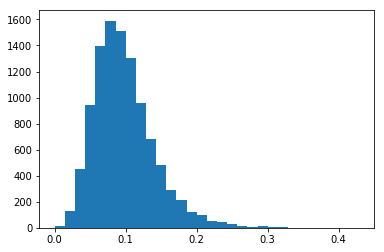

In [140]:
plt.hist(rouge_L, 30)
plt.show()

In [146]:
show_result(9, reference_files, summary_files, souces)

Reference :

danny eckhart , a reserve officer from st. tammany parish in louisiana , was arrested saturday and stripped of his commission

authorities say he drunkenly took a patrol boat out on the tchefuncte river then crashed it into t-river bar and restaurant

st. tammany parish police say he was not on duty . he 's been charged with unauthorized use of a movable and operating a vehicle while intoxicated


Created Summary :

a louisiana volunteer police officer was arrested saturday night after allegedly drunkenly stealing a patrol boat and taking it for a joy ride that ended when he crashed into a riverside bar and grill

danny eckhart was intoxicated , his former co-workers in st. tammany parish say , when he took the vessel out on the tchefuncte river and smashed it into pilings outside the t-rivers bar in madisonville

accused : volunteer st. tammany parish cop danny eckhart is accused of drunkenly taking a police patrol boat for a joy ride and then crashing it into a riverside

In [147]:
sources

[{'doc': "things have n't been going well for manchester united flop anderson since he left old trafford to return to brazil , but at least on wednesday his own errors were outshone by the stupidity of a team - mate\nthe brazil midfielder was sent off for internacional after a first - half off - the - ball shove on ypiranga erechim striker neto that also saw his opponent sent off for retaliating with an elbow\nbut fortunately for anderson , his colleague fabricio stole the limelight by swearing at his own fans and becoming the third player to be shown the red card , reducing internacional to nine men in the 1 - 1 draw in porto alegre\nformer manchester united midfielder anderson shoved neto off the ball to earn a red card neto also saw red after he retaliated by by appearing to aim an elbow at anderson in porto alegre the two players listen to the referee as he reaches for his card from his back pocket on wednesday night anderson shows his shock to be shown the red card for what he bel

In [148]:
predicted_files = sort_filenames((glob('../outputs/predict/*')))

In [ ]:
np.ro